<a href="https://colab.research.google.com/github/akifkashif/Captsone-Project---Data-Application-Energy-Linear-Regression-/blob/main/Captsone_Project_Data_Application_Energy(Linear_Regression)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [97]:
import numpy as np
import pandas as pd
from numpy import math
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

In [9]:
import matplotlib.pyplot as plt                        # visualize with plots
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-white')
import plotly.express as px  
from datetime import datetime 

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [65]:
df = pd.read_csv('/content/drive/MyDrive/data_application_energy.csv',parse_dates=['date'])

In [34]:
df

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [ ]:
df.shape

(19735, 29)

In [ ]:
df.describe(include= "all")

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
unique,19735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2016-01-11 17:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,NaN,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,NaN,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,NaN,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,NaN,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,NaN,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769


In [ ]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8ac12e8f10>,
      dtype=object)

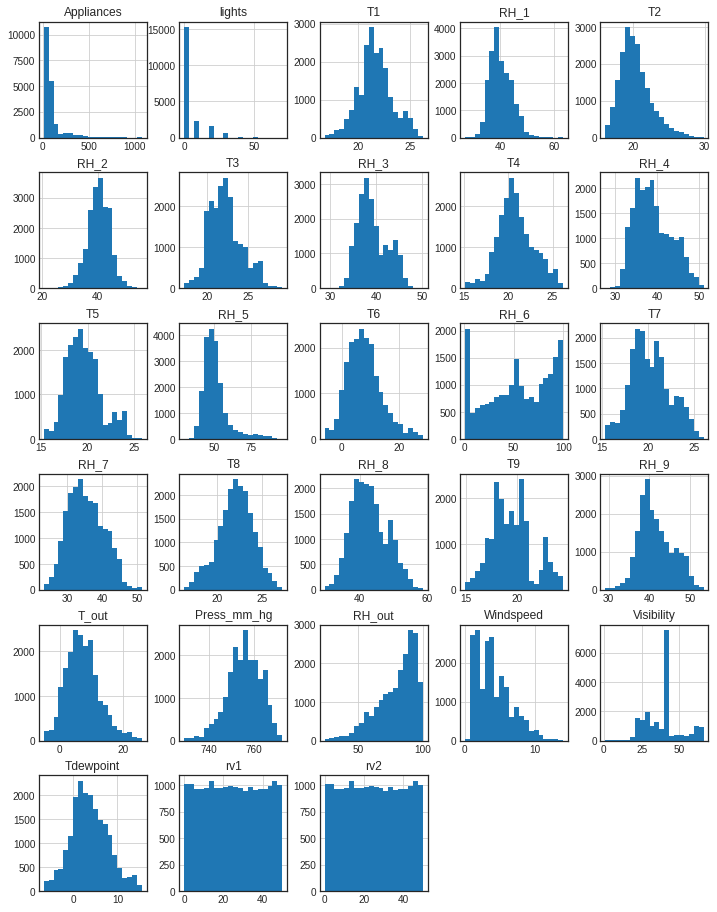

In [ ]:
df.hist(bins = 20 , figsize= (12,16))

Text(1, 17, 'y = 88.01 + 2.55x')

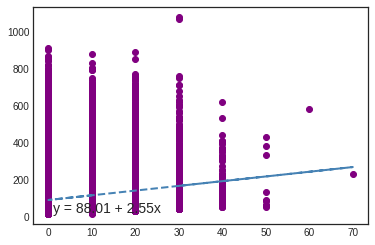

In [ ]:
#@title
x =df["lights"]
y =df['Appliances']

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y, color='purple')

#add line of best fit to plot
plt.plot(x, a*x+b, color='steelblue', linestyle='--', linewidth=2)

#add fitted regression equation to plot
plt.text(1, 17, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=14)

Text(1, 17, 'y = 20.93 + 3.54x')

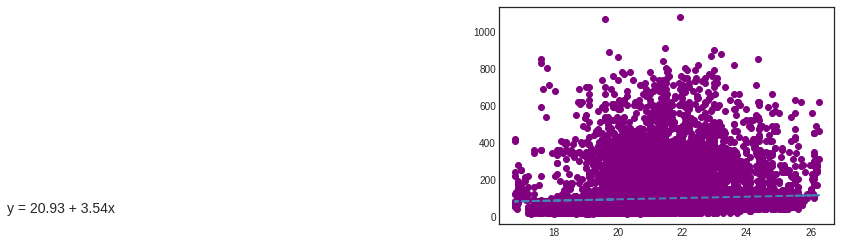

In [ ]:
#@title
x =df["T1"]
y =df['Appliances']

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y, color='purple')

#add line of best fit to plot
plt.plot(x, a*x+b, color='steelblue', linestyle='--', linewidth=2)

#add fitted regression equation to plot
plt.text(1, 17, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=14)

Text(1, 17, 'y = 8.46 + 2.22x')

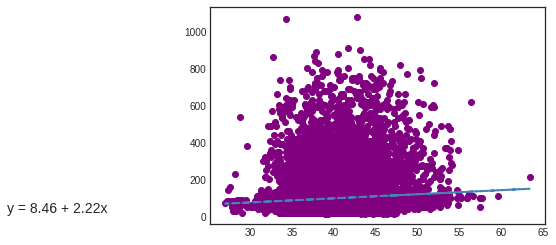

In [ ]:
#@title
x =df["RH_1"]
y =df['Appliances']

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y, color='purple')

#add line of best fit to plot
plt.plot(x, a*x+b, color='steelblue', linestyle='--', linewidth=2)

#add fitted regression equation to plot
plt.text(1, 17, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=14)

Text(1, 17, 'y = -16.49 + 5.61x')

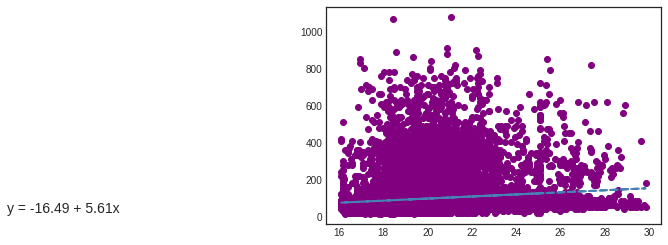

In [ ]:
#@title
x =df["T2"]
y =df['Appliances']

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y, color='purple')

#add line of best fit to plot
plt.plot(x, a*x+b, color='steelblue', linestyle='--', linewidth=2)

#add fitted regression equation to plot
plt.text(1, 17, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=14)

Text(1, 17, 'y = 159.26 + -1.52x')

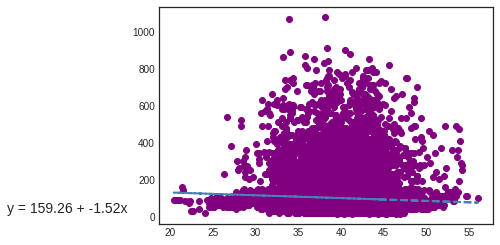

In [ ]:
#@title
x =df["RH_2"]
y =df['Appliances']

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y, color='purple')

#add line of best fit to plot
plt.plot(x, a*x+b, color='steelblue', linestyle='--', linewidth=2)

#add fitted regression equation to plot
plt.text(1, 17, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=14)

Text(1, 17, 'y = 0.90 + 4.35x')

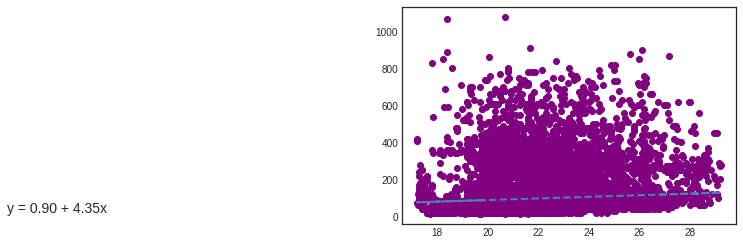

In [ ]:
#@title
x =df["T3"]
y =df['Appliances']

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y, color='purple')

#add line of best fit to plot
plt.plot(x, a*x+b, color='steelblue', linestyle='--', linewidth=2)

#add fitted regression equation to plot
plt.text(1, 17, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=14)

Text(1, 17, 'y = 52.83 + 1.14x')

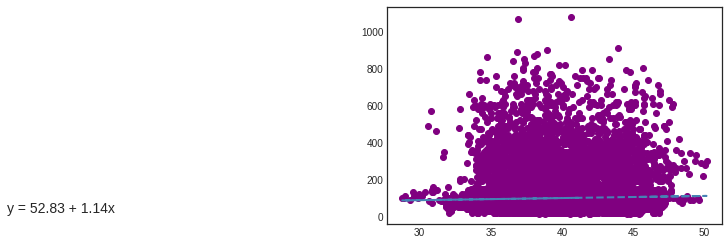

In [ ]:
#@title
x =df["RH_3"]
y =df['Appliances']

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y, color='purple')

#add line of best fit to plot
plt.plot(x, a*x+b, color='steelblue', linestyle='--', linewidth=2)

#add fitted regression equation to plot
plt.text(1, 17, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=14)

Text(1, 17, 'y = 55.53 + 2.02x')

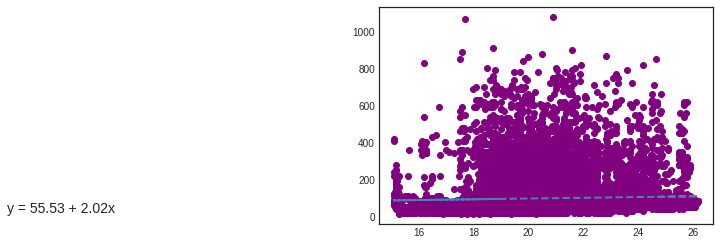

In [ ]:
#@title
x =df["T4"]
y =df['Appliances']

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y, color='purple')

#add line of best fit to plot
plt.plot(x, a*x+b, color='steelblue', linestyle='--', linewidth=2)

#add fitted regression equation to plot
plt.text(1, 17, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=14)

Text(1, 17, 'y = 82.06 + 0.40x')

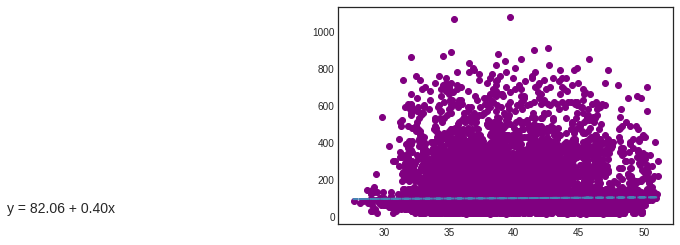

In [ ]:
#@title
x =df["RH_4"]
y =df['Appliances']

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y, color='purple')

#add line of best fit to plot
plt.plot(x, a*x+b, color='steelblue', linestyle='--', linewidth=2)

#add fitted regression equation to plot
plt.text(1, 17, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=14)

In [ ]:
#@title Default title text
x =df["T5"]
y =df['Appliances']

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y, color='purple')

#add line of best fit to plot
plt.plot(x, a*x+b, color='steelblue', linestyle='--', linewidth=2)

#add fitted regression equation to plot
plt.text(1, 17, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=14)

Text(1, 17, 'y = 93.67 + 0.08x')

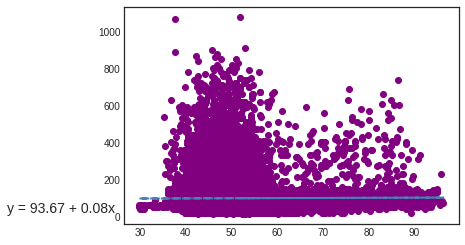

In [ ]:
#@title Default title text
x =df["RH_5"]
y =df['Appliances']

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y, color='purple')

#add line of best fit to plot
plt.plot(x, a*x+b, color='steelblue', linestyle='--', linewidth=2)

#add fitted regression equation to plot
plt.text(1, 17, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=14)

Text(1, 17, 'y = 82.03 + 1.98x')

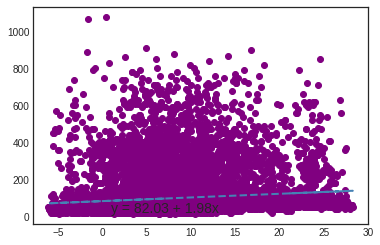

In [ ]:
#@title
x =df["T6"]
y =df['Appliances']

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y, color='purple')

#add line of best fit to plot
plt.plot(x, a*x+b, color='steelblue', linestyle='--', linewidth=2)

#add fitted regression equation to plot
plt.text(1, 17, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=14)

Text(1, 17, 'y = 112.65 + -0.27x')

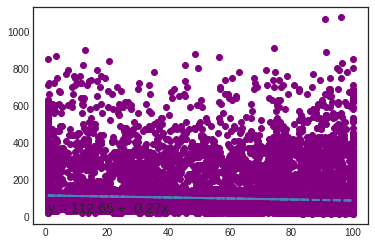

In [ ]:
#@title
x =df["RH_6"]
y =df['Appliances']

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y, color='purple')

#add line of best fit to plot
plt.plot(x, a*x+b, color='steelblue', linestyle='--', linewidth=2)

#add fitted regression equation to plot
plt.text(1, 17, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=14)

Text(1, 17, 'y = 72.29 + 1.25x')

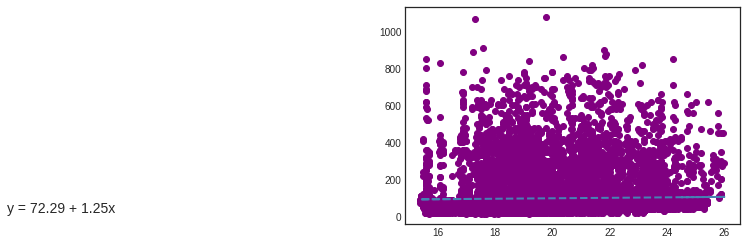

In [ ]:
#@title
x =df["T7"]
y =df['Appliances']

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y, color='purple')

#add line of best fit to plot
plt.plot(x, a*x+b, color='steelblue', linestyle='--', linewidth=2)

#add fitted regression equation to plot
plt.text(1, 17, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=14)

Text(1, 17, 'y = 137.17 + -1.12x')

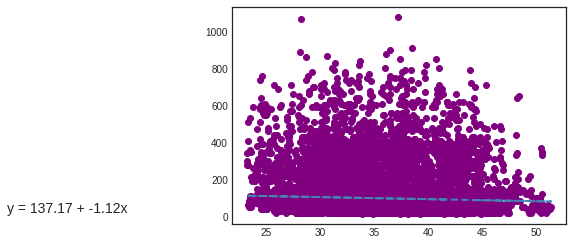

In [ ]:
#@title
x =df["RH_7"]
y =df['Appliances']

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y, color='purple')

#add line of best fit to plot
plt.plot(x, a*x+b, color='steelblue', linestyle='--', linewidth=2)

#add fitted regression equation to plot
plt.text(1, 17, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=14)

Text(1, 17, 'y = 52.01 + 2.07x')

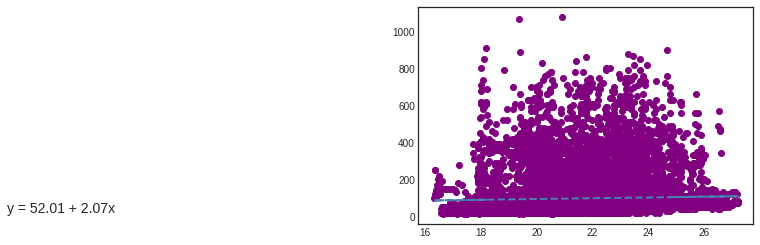

In [ ]:
#@title
x =df["T8"]
y =df['Appliances']

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y, color='purple')

#add line of best fit to plot
plt.plot(x, a*x+b, color='steelblue', linestyle='--', linewidth=2)

#add fitted regression equation to plot
plt.text(1, 17, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=14)

Text(1, 17, 'y = 176.93 + -1.85x')

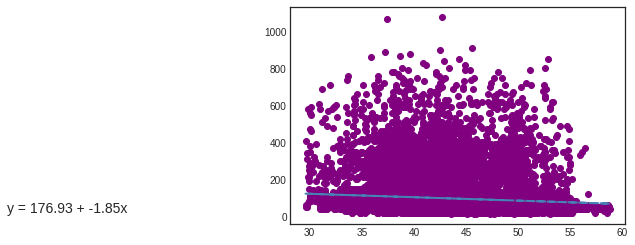

In [ ]:
#@title
x =df["RH_8"]
y =df['Appliances']

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y, color='purple')

#add line of best fit to plot
plt.plot(x, a*x+b, color='steelblue', linestyle='--', linewidth=2)

#add fitted regression equation to plot
plt.text(1, 17, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=14)

Text(1, 17, 'y = 87.77 + 0.51x')

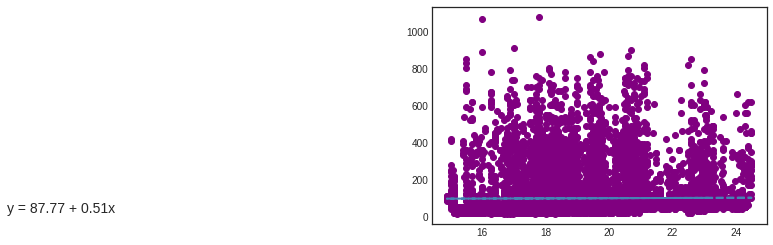

In [ ]:
#@title
x =df["T9"]
y =df['Appliances']

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y, color='purple')

#add line of best fit to plot
plt.plot(x, a*x+b, color='steelblue', linestyle='--', linewidth=2)

#add fitted regression equation to plot
plt.text(1, 17, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=14)

Text(1, 17, 'y = 150.50 + -1.27x')

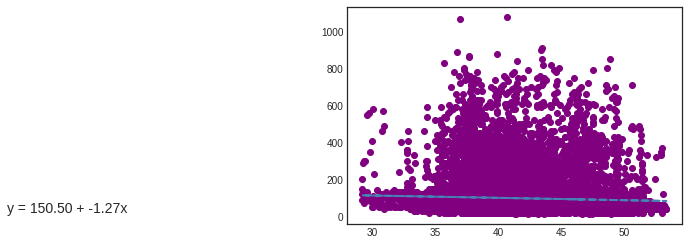

In [ ]:
#@title
x =df["RH_9"]
y =df['Appliances']

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y, color='purple')

#add line of best fit to plot
plt.plot(x, a*x+b, color='steelblue', linestyle='--', linewidth=2)

#add fitted regression equation to plot
plt.text(1, 17, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=14)

Text(1, 17, 'y = 83.53 + 1.91x')

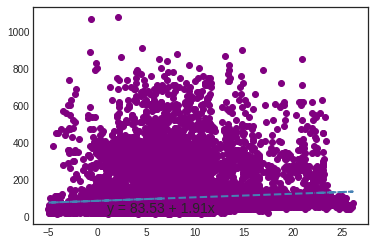

In [ ]:
#@title
x =df["T_out"]
y =df['Appliances']

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y, color='purple')

#add line of best fit to plot
plt.plot(x, a*x+b, color='steelblue', linestyle='--', linewidth=2)

#add fitted regression equation to plot
plt.text(1, 17, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=14)

In [28]:
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

Text(1, 17, 'y = 462.88 + -0.48x')

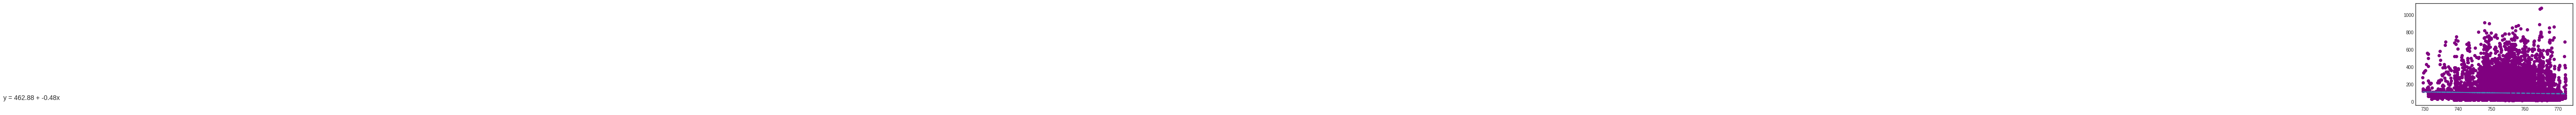

In [ ]:
#@title
x =df["Press_mm_hg"]
y =df['Appliances']

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y, color='purple')

#add line of best fit to plot
plt.plot(x, a*x+b, color='steelblue', linestyle='--', linewidth=2)

#add fitted regression equation to plot
plt.text(1, 17, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=14)

Text(1, 17, 'y = 181.25 + -1.05x')

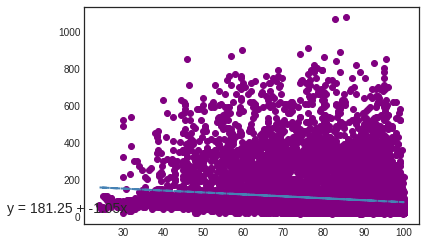

In [ ]:
#@title
x =df["RH_out"]
y =df['Appliances']

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y, color='purple')

#add line of best fit to plot
plt.plot(x, a*x+b, color='steelblue', linestyle='--', linewidth=2)

#add fitted regression equation to plot
plt.text(1, 17, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=14)

Text(1, 17, 'y = 82.97 + 3.64x')

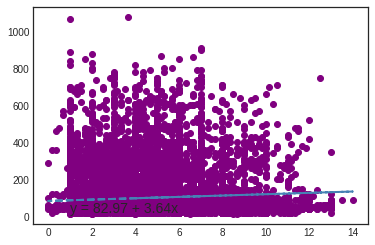

In [ ]:
#@title
x =df["Windspeed"]
y =df['Appliances']

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y, color='purple')

#add line of best fit to plot
plt.plot(x, a*x+b, color='steelblue', linestyle='--', linewidth=2)

#add fitted regression equation to plot
plt.text(1, 17, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=14)

Text(1, 17, 'y = 97.62 + 0.00x')

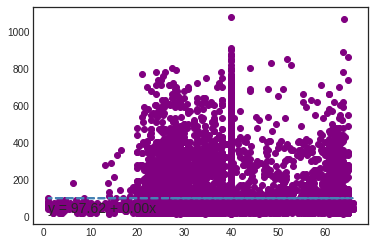

In [ ]:
#@title
x =df["Visibility"]
y =df['Appliances']

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y, color='purple')

#add line of best fit to plot
plt.plot(x, a*x+b, color='steelblue', linestyle='--', linewidth=2)

#add fitted regression equation to plot
plt.text(1, 17, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=14)

Text(1, 17, 'y = 96.28 + 0.38x')

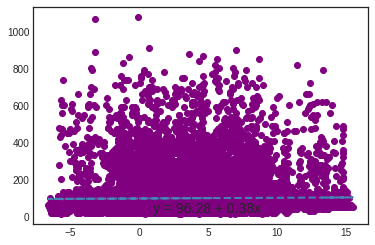

In [ ]:
#@title
x =df["Tdewpoint"]
y =df['Appliances']

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y, color='purple')

#add line of best fit to plot
plt.plot(x, a*x+b, color='steelblue', linestyle='--', linewidth=2)

#add fitted regression equation to plot
plt.text(1, 17, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=14)

Text(1, 17, 'y = 99.66 + -0.08x')

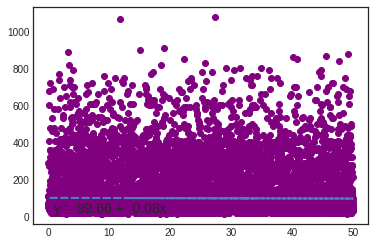

In [ ]:
#@title
x =df["rv1"]
y =df['Appliances']

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y, color='purple')

#add line of best fit to plot
plt.plot(x, a*x+b, color='steelblue', linestyle='--', linewidth=2)

#add fitted regression equation to plot
plt.text(1, 17, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=14)

Text(1, 17, 'y = 99.66 + -0.08x')

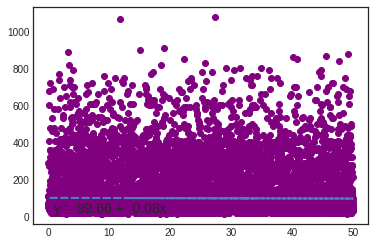

In [ ]:
#@title
x =df["rv2"]
y =df['Appliances']

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y, color='purple')

#add line of best fit to plot
plt.plot(x, a*x+b, color='steelblue', linestyle='--', linewidth=2)

#add fitted regression equation to plot
plt.text(1, 17, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=14)

In [69]:
df = df.set_index('date')

In [70]:
df['month'] = df.index.month
df['weekday'] = df.index.weekday
df['hour'] = df.index.hour
df['week'] = df.index.week

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  after removing the cwd from sys.path.


In [31]:
df

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,month,weekday,hour,week
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,...,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433,1,0,17,2
2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,...,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195,1,0,17,2
2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,...,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668,1,0,17,2
2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,...,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389,1,0,17,2
2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,...,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097,1,0,17,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,...,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812,5,4,17,21
2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,...,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940,5,4,17,21
2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,...,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117,5,4,17,21


In [63]:
df['week'].value_counts()

12    1008
20    1008
18    1008
17    1008
16    1008
15    1008
14    1008
13    1008
3     1008
11    1008
10    1008
9     1008
8     1008
7     1008
6     1008
5     1008
4     1008
19    1008
2      906
21     685
Name: week, dtype: int64

In [40]:
df.weekday.value_counts()

1    2880
2    2880
3    2880
4    2845
0    2778
5    2736
6    2736
Name: weekday, dtype: int64

In [32]:
df.columns

Index(['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2', 'month', 'weekday', 'hour', 'week'],
      dtype='object')

In [66]:
df['day_of_week'] = df['date'].dt.day_name()

In [68]:
df['Date'] = df['date']

In [71]:
df

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,Visibility,Tdewpoint,rv1,rv2,day_of_week,Date,month,weekday,hour,week
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,...,63.000000,5.300000,13.275433,13.275433,Monday,2016-01-11 17:00:00,1,0,17,2
2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,...,59.166667,5.200000,18.606195,18.606195,Monday,2016-01-11 17:10:00,1,0,17,2
2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,...,55.333333,5.100000,28.642668,28.642668,Monday,2016-01-11 17:20:00,1,0,17,2
2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,...,51.500000,5.000000,45.410389,45.410389,Monday,2016-01-11 17:30:00,1,0,17,2
2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,...,47.666667,4.900000,10.084097,10.084097,Monday,2016-01-11 17:40:00,1,0,17,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,...,23.666667,13.333333,43.096812,43.096812,Friday,2016-05-27 17:20:00,5,4,17,21
2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,...,24.500000,13.300000,49.282940,49.282940,Friday,2016-05-27 17:30:00,5,4,17,21
2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,...,25.333333,13.266667,29.199117,29.199117,Friday,2016-05-27 17:40:00,5,4,17,21


In [135]:
df['Type of week'] = ((pd.to_datetime(df['Date']).dt.dayofweek)// 5 == 1).astype(int)
df['Type of week'].value_counts()
df.drop(columns = 'WEEKDAY', inplace = True)
# There are 5472 weekend recordings 

In [115]:
df.groupby('hour')['Appliances'].mean().sort_values( ascending= False)

hour
18    190.364520
17    161.352657
19    143.065693
11    133.126521
20    126.982968
10    125.377129
13    124.744526
12    123.637470
16    119.902676
9     112.785888
14    108.284672
8     106.143552
15    105.827251
21     96.496350
7      78.649635
22     69.148418
6      57.712895
23     56.982968
0      52.785888
5      52.737226
1      51.326034
4      49.355231
2      49.075426
3      48.236010
Name: Appliances, dtype: float64

In [136]:
df.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,Tdewpoint,rv1,rv2,day_of_week,Date,month,weekday,hour,week,Type of week
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,5.3,13.275433,13.275433,Monday,2016-01-11 17:00:00,1,0,17,2,0
2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,5.2,18.606195,18.606195,Monday,2016-01-11 17:10:00,1,0,17,2,0
2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,5.1,28.642668,28.642668,Monday,2016-01-11 17:20:00,1,0,17,2,0
2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,5.0,45.410389,45.410389,Monday,2016-01-11 17:30:00,1,0,17,2,0
2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,4.9,10.084097,10.084097,Monday,2016-01-11 17:40:00,1,0,17,2,0


In [ ]:
# At 18th hour, the usage of appliances is at max

In [116]:
df.groupby('weekday')['Appliances'].mean().sort_values( ascending= False)

weekday
0    111.450684
5    106.246345
4    104.622144
6     94.915936
3     90.434028
2     89.930556
1     87.125000
Name: Appliances, dtype: float64

In [ ]:
# On Sunday, the usage of appliances is at max

In [117]:
df.groupby('week')['Appliances'].mean().sort_values( ascending= False)

week
2     121.953642
14    116.230159
11    113.581349
6     113.164683
21    107.912409
15    105.674603
5      98.888889
9      97.251984
3      96.190476
7      95.704365
17     95.704365
19     95.654762
12     95.218254
16     94.166667
20     93.561508
10     90.674603
8      87.996032
18     83.541667
13     81.101190
4      75.456349
Name: Appliances, dtype: float64

In [ ]:
# On week 2 , the usage of appliances is at max

In [118]:
df.groupby('month')['Appliances'].mean().sort_values( ascending= False)

month
2    100.945881
4     98.888889
1     97.026010
3     96.953405
5     94.199325
Name: Appliances, dtype: float64

In [119]:
df['month'].value_counts()

3    4464
4    4320
2    4176
5    3853
1    2922
Name: month, dtype: int64

In [ ]:
# From the data in the period of months Jan to May, the appliances usage is max on Feb

In [124]:
df.drop

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,rv1,rv2,day_of_week,Date,month,weekday,hour,week,WEEKDAY,Type of week
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,13.275433,13.275433,Monday,2016-01-11 17:00:00,1,0,17,2,0.0,0.0
2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,18.606195,18.606195,Monday,2016-01-11 17:10:00,1,0,17,2,0.0,0.0
2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,28.642668,28.642668,Monday,2016-01-11 17:20:00,1,0,17,2,0.0,0.0
2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,45.410389,45.410389,Monday,2016-01-11 17:30:00,1,0,17,2,0.0,0.0
2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,10.084097,10.084097,Monday,2016-01-11 17:40:00,1,0,17,2,0.0,0.0


In [140]:
gg = list(df.describe().columns)
g = ['month', 'weekday', 'hour', 'week','WEEKDAY', 'Type of week']


In [142]:
gg

['Appliances',
 'lights',
 'T1',
 'RH_1',
 'T2',
 'RH_2',
 'T3',
 'RH_3',
 'T4',
 'RH_4',
 'T5',
 'RH_5',
 'T6',
 'RH_6',
 'T7',
 'RH_7',
 'T8',
 'RH_8',
 'T9',
 'RH_9',
 'T_out',
 'Press_mm_hg',
 'RH_out',
 'Windspeed',
 'Visibility',
 'Tdewpoint',
 'rv1',
 'rv2',
 'Type of week']

In [143]:
gg.remove('Type of week')

In [144]:
gg

['Appliances',
 'lights',
 'T1',
 'RH_1',
 'T2',
 'RH_2',
 'T3',
 'RH_3',
 'T4',
 'RH_4',
 'T5',
 'RH_5',
 'T6',
 'RH_6',
 'T7',
 'RH_7',
 'T8',
 'RH_8',
 'T9',
 'RH_9',
 'T_out',
 'Press_mm_hg',
 'RH_out',
 'Windspeed',
 'Visibility',
 'Tdewpoint',
 'rv1',
 'rv2']

In [121]:
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [152]:
for col in gg:
  outliers = find_outliers_IQR(df[col])
  print(f"column name is {col}")
  print('number of outliers: '+ str(len(outliers)))

  print('max outlier value: '+ str(outliers.max()))

  print('min outlier value: '+ str(outliers.min()))
  
  outliers

column name is Appliances
number of outliers: 2138
max outlier value: 1080
min outlier value: 180
column name is lights
number of outliers: 4483
max outlier value: 70
min outlier value: 10
column name is T1
number of outliers: 515
max outlier value: 26.26
min outlier value: 16.79
column name is RH_1
number of outliers: 146
max outlier value: 63.36
min outlier value: 27.0233333333333
column name is T2
number of outliers: 546
max outlier value: 29.8566666666667
min outlier value: 25.566666666666695
column name is RH_2
number of outliers: 235
max outlier value: 56.0266666666667
min outlier value: 20.463333333333296
column name is T3
number of outliers: 217
max outlier value: 29.236
min outlier value: 27.045909090909095
column name is RH_3
number of outliers: 15
max outlier value: 50.1633333333333
min outlier value: 28.7666666666667
column name is T4
number of outliers: 186
max outlier value: 26.2
min outlier value: 15.1
column name is RH_4
number of outliers: 0
max outlier value: nan
min 

In [153]:
df.shape

(19735, 35)

In [156]:
df.isna().sum()

Appliances      0
lights          0
T1              0
RH_1            0
T2              0
RH_2            0
T3              0
RH_3            0
T4              0
RH_4            0
T5              0
RH_5            0
T6              0
RH_6            0
T7              0
RH_7            0
T8              0
RH_8            0
T9              0
RH_9            0
T_out           0
Press_mm_hg     0
RH_out          0
Windspeed       0
Visibility      0
Tdewpoint       0
rv1             0
rv2             0
day_of_week     0
Date            0
month           0
weekday         0
hour            0
week            0
Type of week    0
dtype: int64

In [167]:
df1 = df.copy()

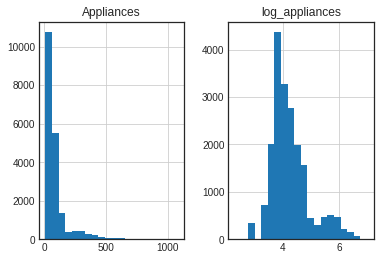

In [168]:
df1['log_appliances'] = np.log(df.Appliances) 
appliance = ["Appliances","log_appliances"]
appliance=df1[appliance]
appliance.hist(bins = 20 ) ;

In [ ]:
#We have applied log transformation to the column appliance which is skewed towards right and the compared the distributions

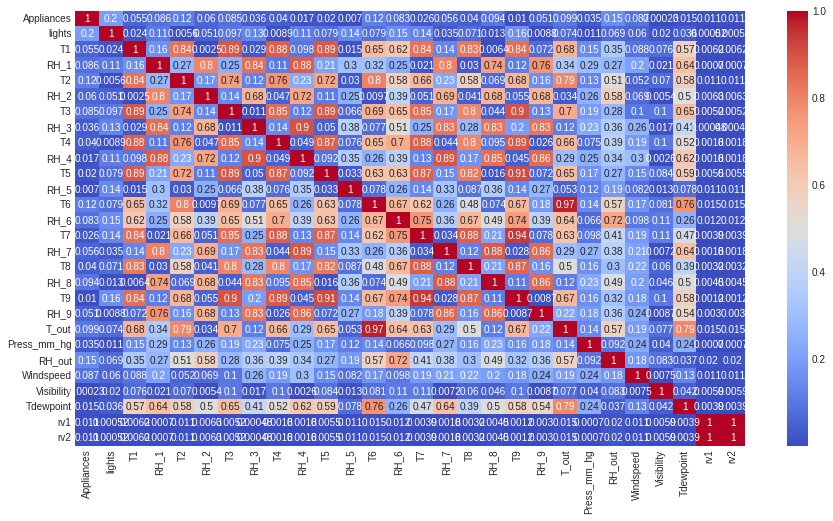

In [ ]:
## Correlation
plt.figure(figsize=(15,8))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [170]:
def compute_vif(considered_features):
    
    X = df[considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1
    
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

In [173]:
considered_features = gg.copy()

In [175]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
compute_vif(considered_features).sort_values('VIF', ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning:

divide by zero encountered in double_scalars



,Variable,VIF
27,rv2,inf
26,rv1,inf
20,T_out,147.180685
25,Tdewpoint,86.180518
22,RH_out,49.263547
12,T6,33.681195
4,T2,28.977770
18,T9,28.396176
5,RH_2,22.238196
2,T1,19.671790


In [177]:
considered_features.remove('rv1')
considered_features.remove('rv2')

In [178]:

compute_vif(considered_features).sort_values('VIF', ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Variable,VIF
20,T_out,147.179004
25,Tdewpoint,86.179275
22,RH_out,49.262101
12,T6,33.680830
4,T2,28.977441
18,T9,28.392700
5,RH_2,22.237582
2,T1,19.671741
14,T7,17.504287
9,RH_4,17.129452


In [187]:
considered_features.remove('T_out')

In [188]:
compute_vif(considered_features).sort_values('VIF', ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Variable,VIF
4,T2,28.547360
18,T9,28.311261
12,T6,26.438300
5,RH_2,21.982339
2,T1,19.416310
24,Tdewpoint,19.183933
14,T7,17.472370
9,RH_4,17.098364
3,RH_1,16.338986
15,RH_7,10.826326


In [189]:
considered_features.remove('Tdewpoint')

In [190]:
compute_vif(considered_features).sort_values('VIF', ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Variable,VIF
18,T9,28.263674
4,T2,27.938850
5,RH_2,21.916757
2,T1,18.901918
14,T7,17.451312
9,RH_4,16.906615
3,RH_1,16.323346
7,RH_3,10.783850
15,RH_7,10.615661
6,T3,10.295676


In [191]:
considered_features.remove('T9')

In [192]:
compute_vif(considered_features).sort_values('VIF', ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Variable,VIF
4,T2,27.184301
5,RH_2,21.117652
2,T1,17.859649
9,RH_4,16.902246
3,RH_1,16.254939
14,T7,12.451099
7,RH_3,10.541192
15,RH_7,10.068931
6,T3,9.669867
8,T4,9.313490


In [193]:
considered_features.remove('T7')

In [194]:
compute_vif(considered_features).sort_values('VIF', ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Variable,VIF
4,T2,27.180346
5,RH_2,21.105506
2,T1,17.829007
9,RH_4,16.600980
3,RH_1,16.250796
7,RH_3,10.507054
6,T3,9.594852
13,RH_6,8.913366
14,RH_7,8.864177
8,T4,8.656459


In [195]:
considered_features.remove('T2')

In [196]:
compute_vif(considered_features).sort_values('VIF', ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Variable,VIF
8,RH_4,15.537779
2,T1,11.303471
3,RH_1,10.433162
6,RH_3,10.312541
5,T3,9.591413
12,RH_6,8.896114
13,RH_7,8.859677
9,T5,8.399683
7,T4,8.231395
15,RH_8,7.182281


In [197]:
considered_features.remove('RH_4')

In [198]:
compute_vif(considered_features).sort_values('VIF', ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Variable,VIF
2,T1,10.399377
6,RH_3,9.594275
5,T3,9.434181
3,RH_1,9.374721
11,RH_6,8.798767
12,RH_7,8.353100
8,T5,8.251098
14,RH_8,7.072351
7,T4,6.960878
4,RH_2,5.924484


In [199]:
considered_features.remove('T1')

In [200]:
compute_vif(considered_features).sort_values('VIF', ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Variable,VIF
2,RH_1,9.313361
5,RH_3,9.200401
10,RH_6,8.439531
11,RH_7,8.200835
7,T5,7.827463
4,T3,7.690329
13,RH_8,6.973372
6,T4,6.472764
9,T6,5.844293
14,RH_9,5.780809


In [201]:
considered_features.remove('RH_1')
compute_vif(considered_features).sort_values('VIF', ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Variable,VIF
9,RH_6,8.439271
10,RH_7,8.200788
6,T5,7.826948
3,T3,7.690055
12,RH_8,6.971619
4,RH_3,6.532144
5,T4,6.420704
13,RH_9,5.761480
8,T6,5.227589
15,RH_out,4.863357


In [202]:
considered_features.remove('RH_6')
compute_vif(considered_features).sort_values('VIF', ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Variable,VIF
9,RH_7,8.147827
6,T5,7.795572
3,T3,7.390834
11,RH_8,6.960554
5,T4,6.353100
4,RH_3,5.879013
12,RH_9,5.684720
10,T8,4.822457
8,T6,4.294771
14,RH_out,4.158724


In [203]:
considered_features.remove('RH_7')
compute_vif(considered_features).sort_values('VIF', ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Variable,VIF
6,T5,7.672865
3,T3,7.337463
5,T4,6.311554
10,RH_8,5.748913
4,RH_3,5.496939
11,RH_9,5.411562
9,T8,4.692671
13,RH_out,3.950439
8,T6,3.754015
2,RH_2,3.235023


In [204]:
considered_features.remove('T5')
compute_vif(considered_features).sort_values('VIF', ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Variable,VIF
3,T3,6.342553
9,RH_8,5.742694
4,RH_3,5.496571
10,RH_9,5.402919
5,T4,5.367045
8,T8,4.237484
12,RH_out,3.949976
7,T6,3.731301
2,RH_2,3.201037
13,Windspeed,1.474281


In [205]:
considered_features.remove('T3')
compute_vif(considered_features).sort_values('VIF', ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Variable,VIF
8,RH_8,5.740209
3,RH_3,5.493973
9,RH_9,5.332459
4,T4,4.085256
11,RH_out,3.921852
7,T8,3.495362
6,T6,3.393235
2,RH_2,3.138914
12,Windspeed,1.474245
10,Press_mm_hg,1.266455


In [206]:
considered_features.remove('RH_8')
compute_vif(considered_features).sort_values('VIF', ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Variable,VIF
3,RH_3,4.804181
8,RH_9,4.336095
4,T4,4.076465
7,T8,3.485200
10,RH_out,3.396153
6,T6,3.282180
2,RH_2,3.128822
11,Windspeed,1.465661
9,Press_mm_hg,1.264202
5,RH_5,1.207905


In [207]:
df.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,Tdewpoint,rv1,rv2,day_of_week,Date,month,weekday,hour,week,Type of week
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,5.3,13.275433,13.275433,Monday,2016-01-11 17:00:00,1,0,17,2,0
2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,5.2,18.606195,18.606195,Monday,2016-01-11 17:10:00,1,0,17,2,0
2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,5.1,28.642668,28.642668,Monday,2016-01-11 17:20:00,1,0,17,2,0
2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,5.0,45.410389,45.410389,Monday,2016-01-11 17:30:00,1,0,17,2,0
2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,4.9,10.084097,10.084097,Monday,2016-01-11 17:40:00,1,0,17,2,0
